# Unsupervised Learning using Scikit Learn 


![](https://i.imgur.com/eyfi64y.png)

The following topics are covered in this tutorial:

- Overview of unsupervised learning algorithms in Scikit-learn
- Clustering algorithms: K Means, DBScan, Hierarchical clustering etc.
- Dimensionality reduction (PCA) and manifold learning (t-SNE)

## Introduction to Unsupervised Learning

Unsupervised machine learning refers to the category of machine learning techniques where models are trained on a dataset without labels. Unsupervised learning is generally use to discover patterns in data and reduce high-dimensional data to fewer dimensions. Here's how unsupervised learning fits into the landscape of machine learning algorithms([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">

Here are the topics in machine learning that we're studying in this course ([source](https://vas3k.com/blog/machine_learning/)): 

<img src="https://i.imgur.com/VbVFAsg.png" width="640">

Scikit-learn offers the following cheatsheet to decide which model to pick for a given problem. Can you identify the unsupervised learning algorithms?

![](https://scikit-learn.org/stable/_static/ml_map.png)

Here is a full list of unsupervised learning algorithms available in Scikit-learn: https://scikit-learn.org/stable/unsupervised_learning.html

Here is a visual representation of clustering:

<img src="https://i.imgur.com/VXPgw6H.png" width="400">


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
iris_df = sns.load_dataset('iris')

In [3]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


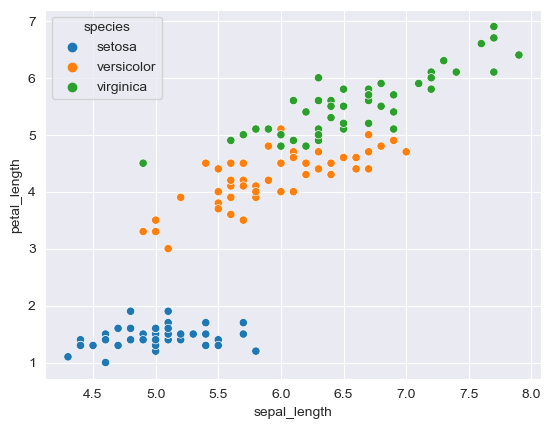

In [4]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species');

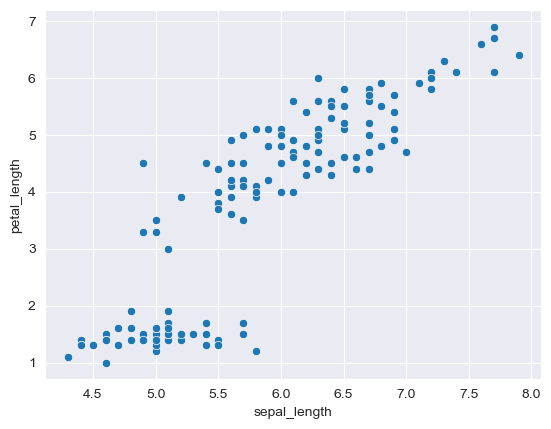

In [7]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length');

We'll attempt to cluster observations using numeric columns in the data. 

In [5]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [6]:
X = iris_df[numeric_cols]

### K Means Clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.

<img src="https://miro.medium.com/max/1400/1*rw8IUza1dbffBhiA4i0GNQ.png" width="640">

Here's how the K-means algorithm works:

1. Pick K random objects as the initial cluster centers.
2. Classify each object into the cluster whose center is closest to the point.
3. For each cluster of classified objects, compute the centroid (mean).
4. Now reclassify each object using the centroids as cluster centers.
5. Calculate the total variance of the clusters (this is the measure of goodness).
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.

Here's a video showing the above steps: https://www.youtube.com/watch?v=4b5d3muPQmA

In [8]:
from sklearn.cluster import KMeans

In [9]:
model = KMeans(n_clusters=3, random_state=42)

In [10]:
model.fit(X)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

We can check the cluster centers for each cluster.

In [11]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

We can now classify points using the model.

In [12]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
preds = model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

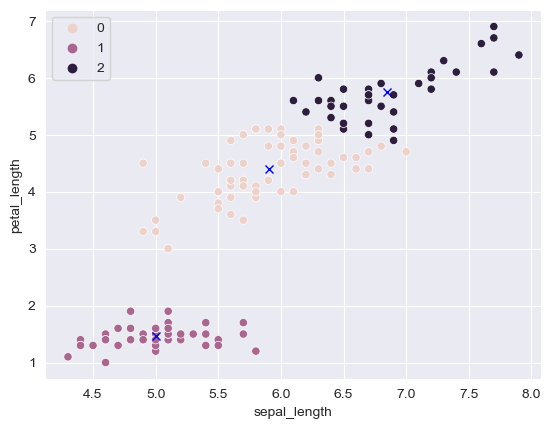

In [14]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds);
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

As you can see, K-means algorithm was able to classify (for the most part) different specifies of flowers into separate clusters. Note that we did not provide the "species" column as an input to `KMeans`.

In [15]:
model.inertia_

78.851441426146

Let's try creating 6 clusters.

In [16]:
model = KMeans(n_clusters=6, random_state=42).fit(X)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
preds = model.predict(X)
preds

array([5, 1, 1, 1, 5, 5, 1, 5, 1, 1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 1, 1, 5, 5, 5, 1, 1, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 1, 5,
       5, 1, 5, 1, 5, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

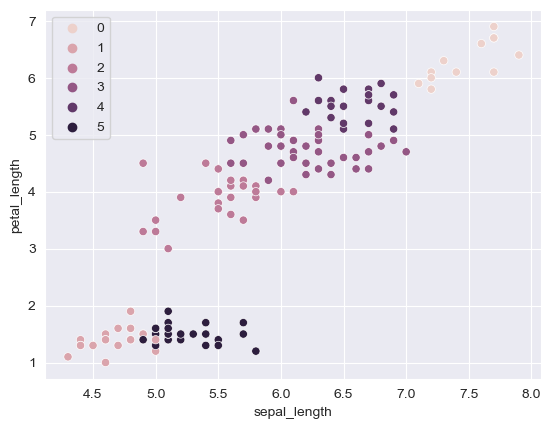

In [18]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds);

In most real-world scenarios, there's no predetermined number of clusters. In such a case, you can create a plot of "No. of clusters" vs "Inertia" to pick the right number of clusters.